<h1 style="color:red" align="center"> Projet d'introduction au Machine Learning <br/> Out-Of-Domain PoS Tagging <br/> Présentation des résultats algorithmique</h1>

In [1]:
#chargement des corpus en mémoire

import dataAnalysis as da
import matplotlib.pyplot as plt
import numpy as np
da.init()

Initialization...
	Preparing corpus fr.foot.test.json...
	Done
	Preparing corpus fr.gsd.test.json...
	Done
	Preparing corpus fr.sequoia.train.json...
	Done
	Preparing corpus fr.ftb.test.json...
	Done
	Preparing corpus fr.ftb.dev.json...
	Done
	Preparing corpus fr.spoken.test.json...
	Done
	Preparing corpus fr.pud.train.json...
	Done
	Preparing corpus fr.spoken.train.json...
	Done
	Preparing corpus fr.natdis.test.json...
	Done
	Preparing corpus fr.partut.dev.json...
	Done
	Preparing corpus fr.sequoia.test.json...
	Done
	Preparing corpus fr.gsd.dev.json...
	Done
	Preparing corpus fr.sequoia.dev.json...
	Done
	Preparing corpus fr.gsd.train.json...
	Done
	Preparing corpus fr.pud.test.json...
	Done
	Preparing corpus fr.ftb.train.json...
	Done
	Preparing corpus fr.partut.test.json...
	Done
	Preparing corpus fr.partut.train.json...
	Done
	Preparing corpus fr.spoken.dev.json...
	Done
Done!


# Statistique des corpus

In [2]:
#itère sur chacun des corpus
def iterateCorpus(f, printing = True):
    for nameCorpus, corpus in da.listeCorpus.items():
        if printing:
            print("corpus : ", nameCorpus)
        for typeDS, dataset in corpus.getDataset().items():
            if printing:
                print("ensemble ", typeDS)
            f(dataset, nameCorpus, typeDS)

# met à jour les données statistiques
def updateStat(dataset, nm, tds):
    dataset.updateStat()

# affiche les statistiques basique


def printBasicStat(dataset, nm, tds):
    #baseStat.append((nm + " " + tds, len(dataset.data), dataset.nbWord, dataset.nbUniqueWords))
    print("   nombre de phrase : ", len(dataset.data))
    print("   nombre de mot : ", dataset.nbWord)
    print("   nombre de mot unique : ", dataset.nbUniqueWords)


    

# affiche les 10 mots / labels les plus fréquents de chaque corpus
def printMostFrequent(dataset, nm, tds):
    print()
    print("10 mots les plus fréquents : ")
    print(dataset.mostFrequentWord)
    print()
    print()
    print("labels les plus fréquents : ")
    print(dataset.mostFrequentLabel)
    print()
    
# affiche les 10 mots les plus ambigu de chaque corpus
def printMostAmbiguousWord(dataset, nm, tds):
    ambiguousDict, ambiguousWord = dataset.ambiguousWord()
    
    def sortSecond(val):
        return len(val[1])
    
    ambiguousWord.sort(key = sortSecond, reverse = True)
    
    print()
    print("5 mots les plus ambigu : ", ambiguousWord[:5])
    print()
    
iterateCorpus(updateStat, False)

La bibliothèque tabulate présent dans la cellule ci-dessous est une bibliothèque permettant d'afficher un tableau python au format latex pour faciliter leurs intégrations dans le rapport. C'est une bibliothèque que nous avons ajouter plus tard, elle n'est pas standard à python d'ou sa mise en commentaire

In [3]:
#baseStat = []

iterateCorpus(printBasicStat)

#from tabulate import tabulate

#print(tabulate(baseStat, tablefmt="latex", floatfmt=".2f"))

corpus :  foot
ensemble  test
   nombre de phrase :  743
   nombre de mot :  13985
   nombre de mot unique :  2638
corpus :  gsd
ensemble  train
   nombre de phrase :  14450
   nombre de mot :  345009
   nombre de mot unique :  41072
ensemble  test
   nombre de phrase :  416
   nombre de mot :  9742
   nombre de mot unique :  3172
ensemble  dev
   nombre de phrase :  1476
   nombre de mot :  34664
   nombre de mot unique :  8964
corpus :  sequoia
ensemble  train
   nombre de phrase :  2231
   nombre de mot :  49173
   nombre de mot unique :  8185
ensemble  test
   nombre de phrase :  456
   nombre de mot :  9740
   nombre de mot unique :  2922
ensemble  dev
   nombre de phrase :  412
   nombre de mot :  9724
   nombre de mot unique :  2789
corpus :  ftb
ensemble  train
   nombre de phrase :  14759
   nombre de mot :  442228
   nombre de mot unique :  27127
ensemble  test
   nombre de phrase :  2541
   nombre de mot :  75073
   nombre de mot unique :  9845
ensemble  dev
   nombre de phr

In [4]:
iterateCorpus(printMostFrequent)

corpus :  foot
ensemble  test

10 mots les plus fréquents : 
[('__MENTION__', 549), ('la', 433), ('__SHARP__', 395), ('Juventus', 368), (':', 338)]


labels les plus fréquents : 
[('PUNCT', 1702), ('VERB', 1653), ('PROPN', 1614), ('NOUN', 1570), ('DET', 1338)]

corpus :  gsd
ensemble  train

10 mots les plus fréquents : 
[('de', 16964), (',', 16595), ('.', 13359), ('la', 8676), ('et', 7148)]


labels les plus fréquents : 
[('NOUN', 66494), ('ADP', 46864), ('DET', 44966), ('PUNCT', 39134), ('VERB', 28438)]

ensemble  test

10 mots les plus fréquents : 
[(',', 489), ('de', 426), ('.', 353), ('la', 222), ('et', 182)]


labels les plus fréquents : 
[('NOUN', 1852), ('DET', 1217), ('ADP', 1205), ('PUNCT', 1195), ('VERB', 828)]

ensemble  dev

10 mots les plus fréquents : 
[('de', 1750), (',', 1562), ('.', 1375), ('la', 898), ('__DIGIT__', 726)]


labels les plus fréquents : 
[('NOUN', 6773), ('ADP', 4697), ('DET', 4507), ('PUNCT', 3816), ('VERB', 2781)]

corpus :  sequoia
ensemble  train

1

In [5]:
#mot les plus ambigu de chaque corpus

iterateCorpus(printMostAmbiguousWord)

corpus :  foot
ensemble  test

5 mots les plus ambigu :  [('tout', Counter({'DET': 6, 'ADV': 5, 'PRON': 4, 'ADJ': 1, 'NOUN': 1})), ('C', Counter({'PRON': 7, 'X': 3, 'DET': 1, 'VERB': 1})), ('A', Counter({'ADP': 5, 'ADJ': 4, 'X': 3, 'VERB': 1})), ('de', Counter({'ADP': 322, 'PROPN': 2, 'DET': 1})), ('en', Counter({'ADP': 133, 'PRON': 9, 'ADV': 1}))]

corpus :  gsd
ensemble  train

5 mots les plus ambigu :  [('a', Counter({'AUX': 1592, 'VERB': 326, 'ADP': 20, 'X': 4, 'DET': 4, 'NOUN': 1, 'PROPN': 1})), ('A', Counter({'ADP': 77, 'PROPN': 9, 'X': 6, 'DET': 5, 'NOUN': 4, 'AUX': 1})), ("qu'", Counter({'SCONJ': 586, 'PRON': 233, 'ADV': 70, 'ADP': 6, 'PROPN': 2})), ('est', Counter({'AUX': 4530, 'VERB': 136, 'NOUN': 37, 'ADJ': 3, 'CCONJ': 1})), ('tout', Counter({'ADV': 117, 'DET': 98, 'PRON': 69, 'NOUN': 15, 'ADJ': 1}))]

ensemble  test

5 mots les plus ambigu :  [('tout', Counter({'NOUN': 5, 'ADV': 5, 'PRON': 4, 'DET': 3, 'ADJ': 1})), ("qu'", Counter({'SCONJ': 27, 'PRON': 4, 'ADV': 2})), ('que

## Out Of Vocabulary Word

In [6]:
# Calcul des Out of Vocabulary Words
oovLatex = []


footTest = da.listeCorpus['foot'].testDataSet
natdisTest = da.listeCorpus['natdis'].testDataSet


for nameCorpus, corpus in da.listeCorpus.items():
    if corpus.trainExist:
        oovResult = corpus.computeCorpusOOV()
        oovResultFoot = corpus.computeOOV(footTest)
        oovResultnatdis = corpus.computeOOV(natdisTest)
        print(nameCorpus, " : ")
        print("     Pourcentage de l'oov entre train et test : ", oovResult[0])
        print("     Pourcentage de l'oov entre train et dev : ", oovResult[1])
        print("     Pourcentage de l'oov entre train et footTest : ", oovResultFoot)
        print("     Pourcentage de l'oov entre train et natdisTest : ", oovResultnatdis)
        latexRows = (nameCorpus, oovResult[0], oovResult[1], oovResultFoot, oovResultnatdis)
        oovLatex.append(latexRows)

#print(tabulate(oovLatex, tablefmt="latex"))

gsd  : 
     Pourcentage de l'oov entre train et test :  1.2792695054696683
     Pourcentage de l'oov entre train et dev :  4.998401151171157
     Pourcentage de l'oov entre train et footTest :  2.539464653397392
     Pourcentage de l'oov entre train et natdisTest :  1.2270800646324613
sequoia  : 
     Pourcentage de l'oov entre train et test :  7.6618348789051955
     Pourcentage de l'oov entre train et dev :  7.289958082741024
     Pourcentage de l'oov entre train et footTest :  15.94751917213342
     Pourcentage de l'oov entre train et natdisTest :  9.168704156479219
ftb  : 
     Pourcentage de l'oov entre train et test :  5.606945796819215
     Pourcentage de l'oov entre train et dev :  3.1985032074126867
     Pourcentage de l'oov entre train et footTest :  4.397782630606417
     Pourcentage de l'oov entre train et natdisTest :  2.103762431323458
spoken  : 
     Pourcentage de l'oov entre train et test :  26.569084054113993
     Pourcentage de l'oov entre train et dev :  23.5812796

## Divergence de Kullback-Leibler

In [7]:
# Calcul des divergence de KullBack-Leibler

latexDKL = []

for nameCorpus, corpus in da.listeCorpus.items():
    if corpus.trainExist:
        print(nameCorpus + " : ")
        DKLResult = corpus.computeCorpusKLDivergence()
        DKLFootresult = corpus.computeKLDivergence(footTest)
        DKLnatdisResult = corpus.computeKLDivergence(natdisTest)
        print("     Dkl(test||train) = ", DKLResult)
        print("     Dkl(footTest||train) = ", DKLFootresult)
        print("     Dkl(natdisTest||train) = ", DKLnatdisResult)
        latexDKL.append( (nameCorpus, DKLResult, DKLFootresult, DKLnatdisResult) )
        
        
#print(tabulate(latexDKL, tablefmt="latex"))

gsd : 
     Dkl(test||train) =  0.00048196222755944026
     Dkl(footTest||train) =  0.0003143669085416784
     Dkl(natdisTest||train) =  0.00038174536448815544
sequoia : 
     Dkl(test||train) =  0.00024102050094092578
     Dkl(footTest||train) =  0.00016308818524738436
     Dkl(natdisTest||train) =  0.00021892556061260213
ftb : 
     Dkl(test||train) =  3.2385790601336957e-05
     Dkl(footTest||train) =  0.0003393601099713701
     Dkl(natdisTest||train) =  0.0004104307433739253
spoken : 
     Dkl(test||train) =  0.00012402849851564268
     Dkl(footTest||train) =  6.262475735896758e-05
     Dkl(natdisTest||train) =  0.00015146410087670418
pud : 
     Dkl(test||train) =  2.6255100867596175e-05
     Dkl(footTest||train) =  0.00011448896143588248
     Dkl(natdisTest||train) =  0.000185953235026299
partut : 
     Dkl(test||train) =  0.001217117421370489
     Dkl(footTest||train) =  0.00011448896143588248
     Dkl(natdisTest||train) =  0.000185953235026299


# Perplexity

In [8]:
latexPerplexity = []

print("                         train,                   test,              dev")
for nameCorpus, corpus in da.listeCorpus.items():
    print(nameCorpus, " : ")
    pp_res = corpus.computePerplexityCorpus()
    print("     perplexity : ", pp_res)
    latexRow = []
    latexRow.append(nameCorpus)
    if type(pp_res) == tuple:
        for i in pp_res:
            latexRow.append(i)
    else:
        latexRow.append(pp_res)
    latexPerplexity.append( latexRow )
    
#print(tabulate(latexPerplexity, tablefmt="latex"))

                         train,                   test,              dev
foot  : 
     perplexity :  1.5791330743212235
gsd  : 
     perplexity :  (2.407954466873633, 1.385876448264396, 1.6507393312581355)
sequoia  : 
     perplexity :  (1.7987852435515201, 1.3928628396872547, 1.4259206480961242)
ftb  : 
     perplexity :  (2.6351165772476572, 2.04521580101736, 1.8425446804188337)
spoken  : 
     perplexity :  (1.6779439092581983, 1.5777400548265215, 1.5915803800198014)
pud  : 
     perplexity :  (1.7384746399764985, 1.6306739531346197)
natdis  : 
     perplexity :  1.4473201590339735
partut  : 
     perplexity :  (1.7384746399764985, 1.2385736750823897, 1.1995082059790045)


# Training Model
## Decision Tree Classifier

### Validation croisée detection des meilleurs hyper-paramètre

In [10]:
import modelAnalysis as ma
import DecisionTreeClassifier as dtree
import features as ft

In [ ]:
# temps de calcul de cette cellule très long en raison du parcours de l'ensemble des corpus
# pour la validation croisé (compter environ 1h)
for namedataset, _ in da.listeCorpus.items():
    if namedataset not in ["gsd", "ftb"]:
        ma.analyzeDecisionTree(namedataset, verbose=True)

In [ ]:
# temps de calcul de cette cellule très long en raison des deux plus gros ensemble ftb et gsd (compter environ 2h)
for namedataset, _ in da.listeCorpus.items():
    if namedataset in ["gsd", "ftb"]:
        ma.analyzeDecisionTree(namedataset, verbose=True)

### Analyse du changement de contexte avec les meilleurs hyper-paramètres

In [12]:
footTest = da.listeCorpus["foot"].testDataSet
natdisTest = da.listeCorpus["natdis"].testDataSet

Xfoot, Yfoot = ft.buildFeature(footTest)
Xnatdis, Ynatdis = ft.buildFeature(natdisTest)

In [ ]:
corpus = ["partut", "pud", "sequoia", "spoken", "gsd"]
# meilleur paramètre de chacun des corpus récupéré par validation croisé ci-dessus
bestParam = [(15, "entropy", "mean"), (16, "entropy", "mean"), 
             (17, "entropy", "median"), (15, "entropy", "mean"),
             (20, "entropy", "median")]

for nameDataset, (max_depth, split_criterion, gen_test) in zip(corpus, bestParam):
    print("debut " + nameDataset)
    train = da.listeCorpus[nameDataset].trainDataSet
    Xtrain, Ytrain = ft.buildFeature(train)

    
    decisionTree = dtree.DecisionTreeClassifier(Xtrain, Ytrain, 
                                                max_depth=max_depth, 
                                                split_criterion=split_criterion, 
                                                gen_test=gen_test)
    tree = decisionTree.fit()
    
    scoreFoot, cm_foot = decisionTree.modelScore(tree, Xfoot, Yfoot)
    scoreNatdis, cm_natdis = decisionTree.modelScore(tree, Xnatdis, Ynatdis)
    
    cm_foot_fig = ma.showConfusionMatrix(
            cm_foot, decisionTree.classLabel.keys(), title="confusion matrix between " + nameDataset + " train and foot test")
    
    cm_natdis_fig = ma.showConfusionMatrix(
            cm_natdis, decisionTree.classLabel.keys(), title="confusion matrix between " + nameDataset + " train and natdis test")
    
    cm_foot_fig.savefig("../results/decisionTree/confusion_matrix_foot_" + nameDataset)
    cm_natdis_fig.savefig("../results/decisionTree/confusion_matrix_natdis_" + nameDataset)
    
    print("fin " + nameDataset)

## Naive Bayes Classifier

L'exécution des cellules ci dessous prennent environ 10 minutes chacune

Begin :  gsd
training time : 51.49307322502136
score time :  51.760815382003784
score on gsd is 16.095257647300347


/home/fusroman/Documents/Informatique_et_Programmation/Intelligence Artificielle/M1_Intro_machine_learning/Projet/src/modelAnalysis.py:238: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


Begin :  sequoia
training time : 7.08403754234314
score time :  55.236372232437134
score on sequoia is 16.88911704312115
Begin :  ftb
training time : 71.08383512496948
score time :  357.9187686443329
score on ftb is 19.658199352630106
Begin :  spoken
training time : 2.287351131439209
score time :  42.80809831619263
score on spoken is 9.89010989010989
Begin :  pud
training time : 3.349118232727051
score time :  115.11133337020874
score on pud is 17.1845223299362
Begin :  partut
training time : 3.4486582279205322
score time :  12.037813901901245
score on partut is 11.491053677932406


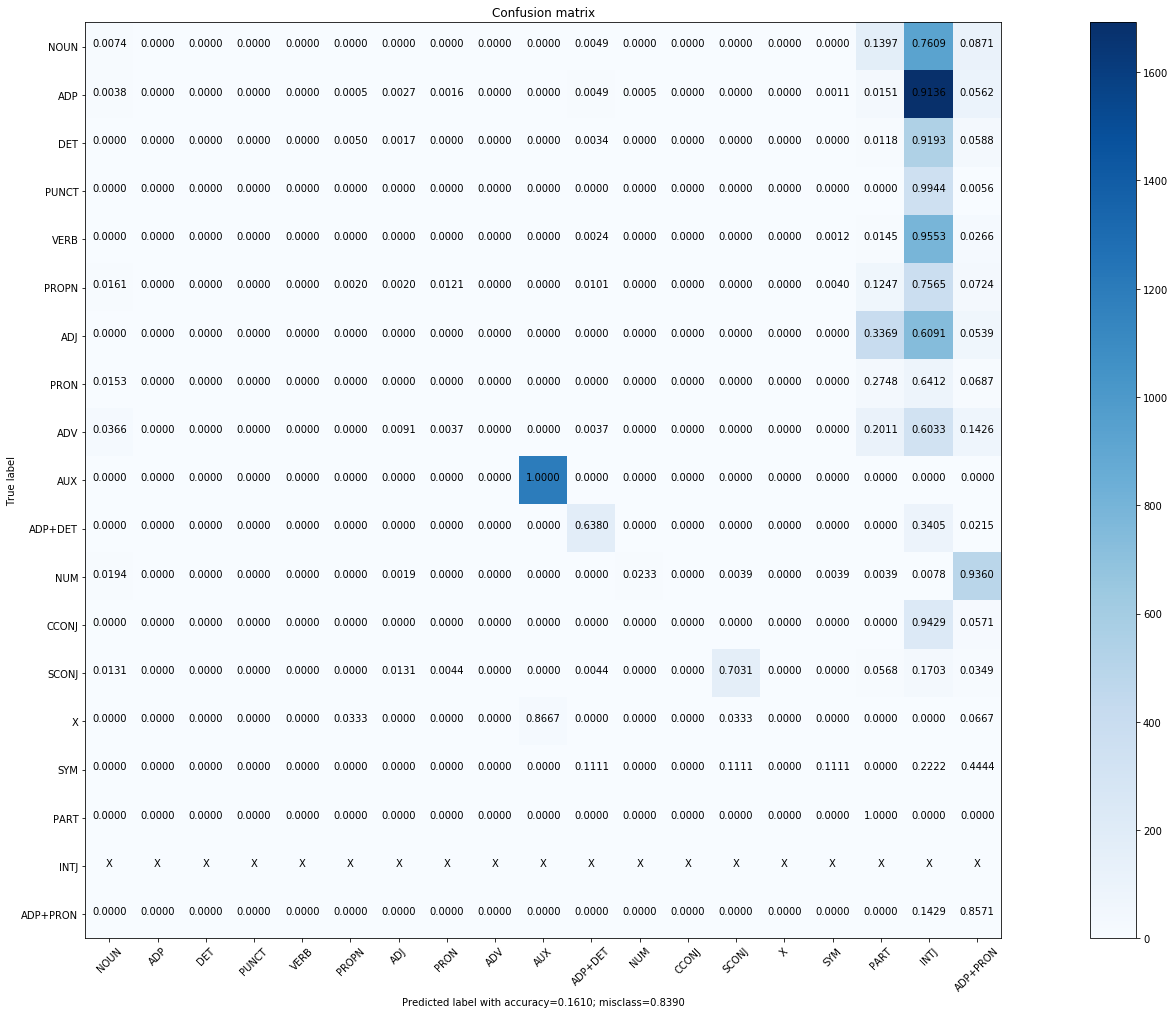

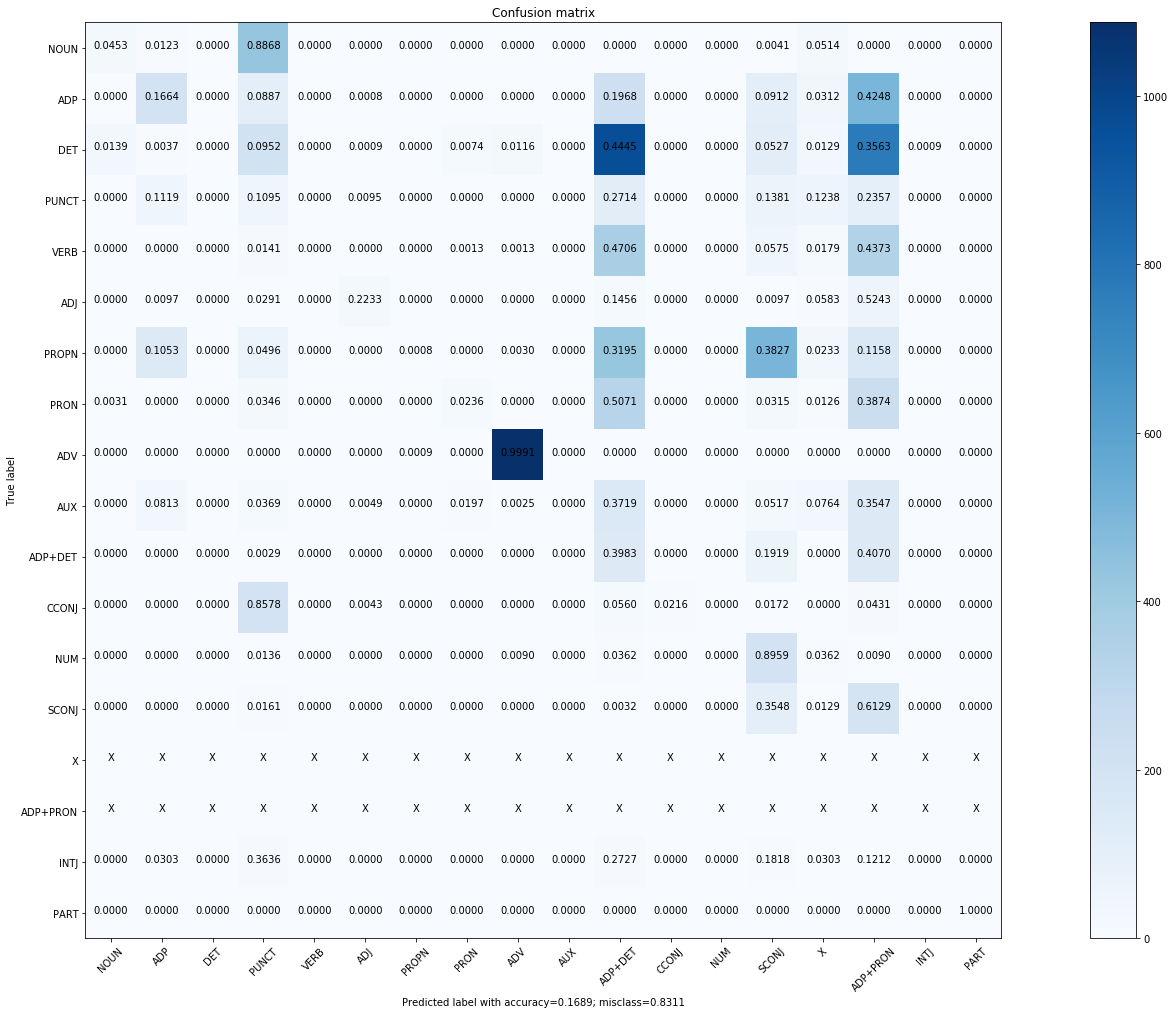

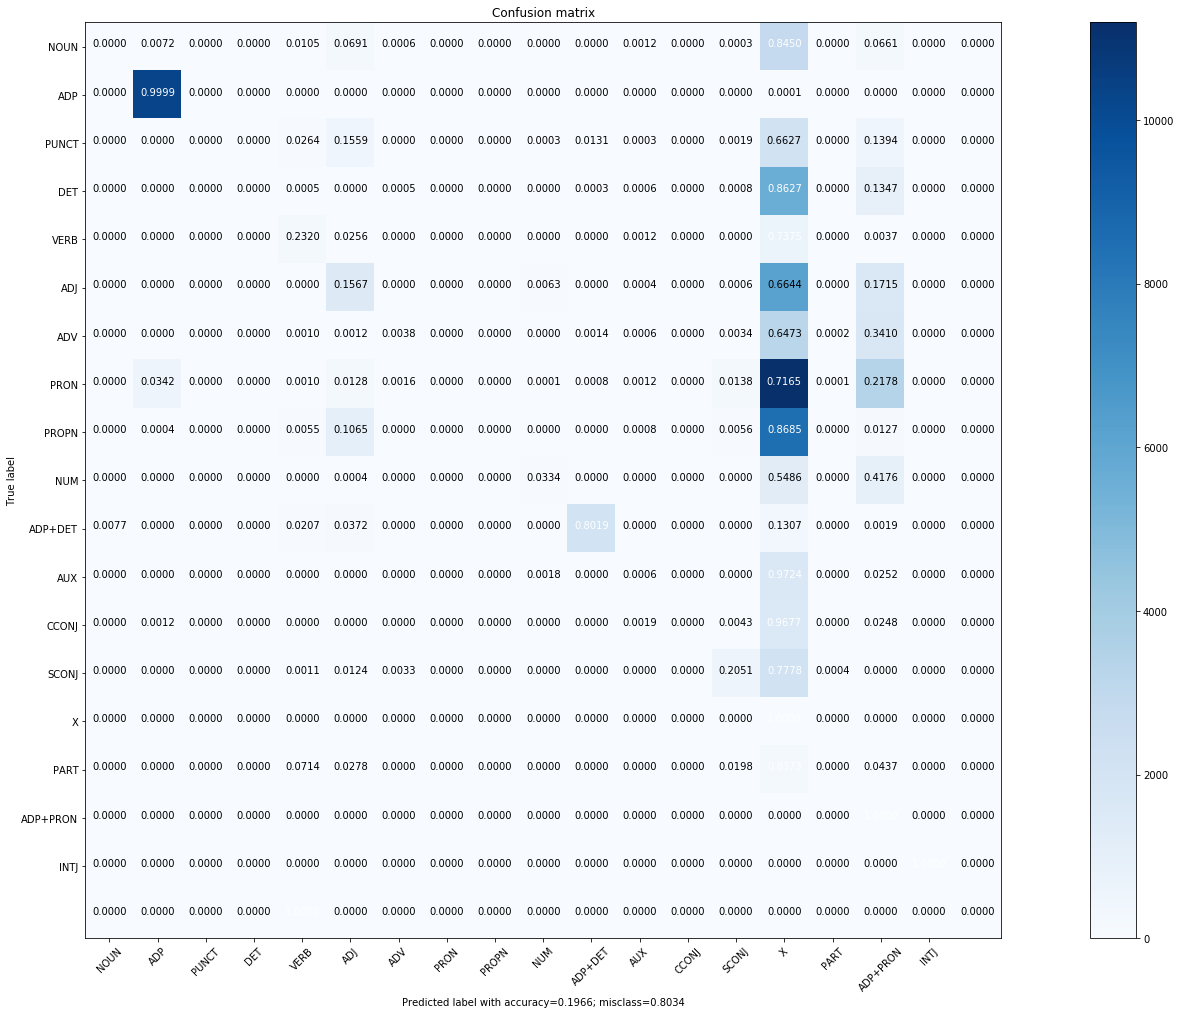

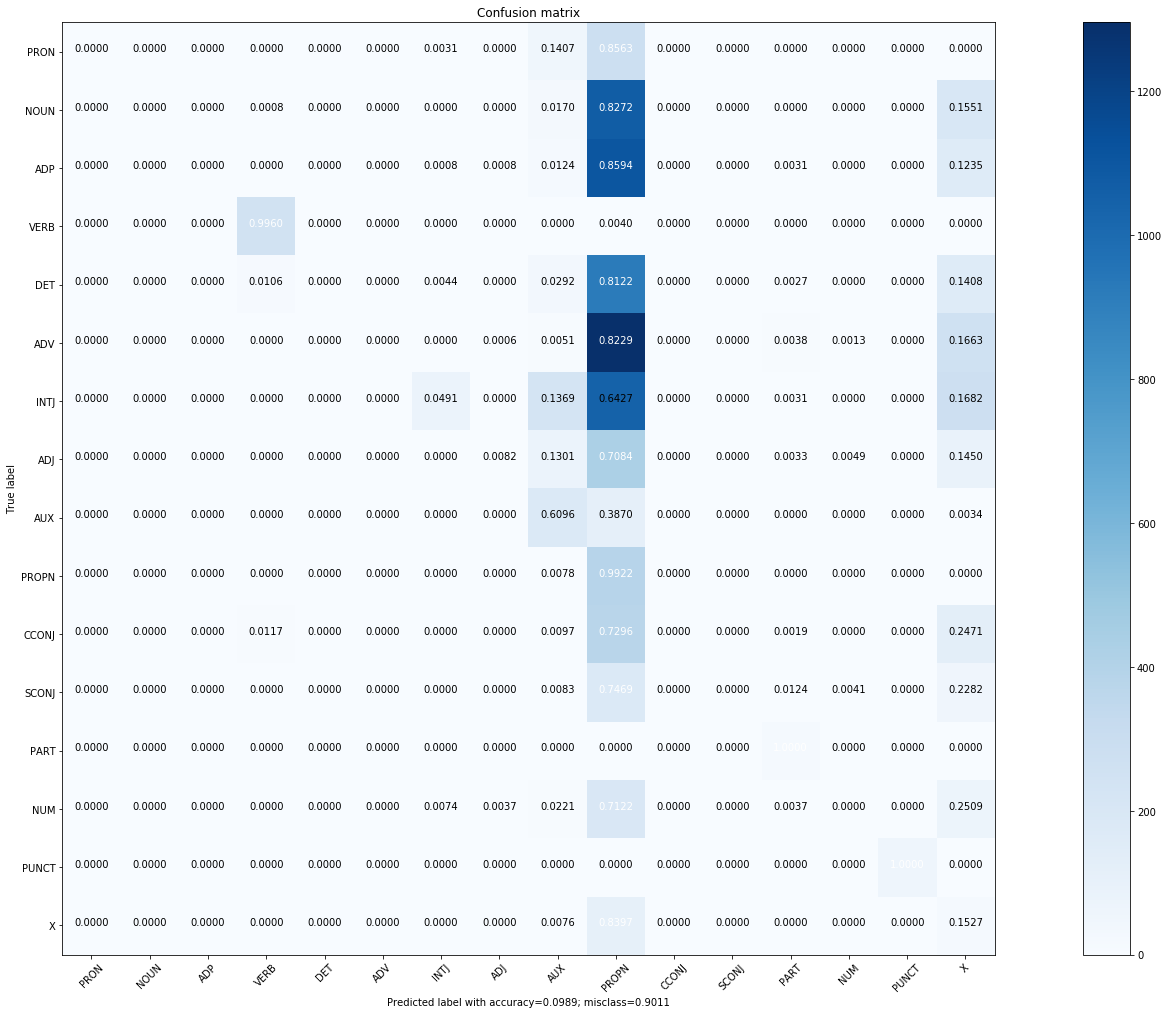

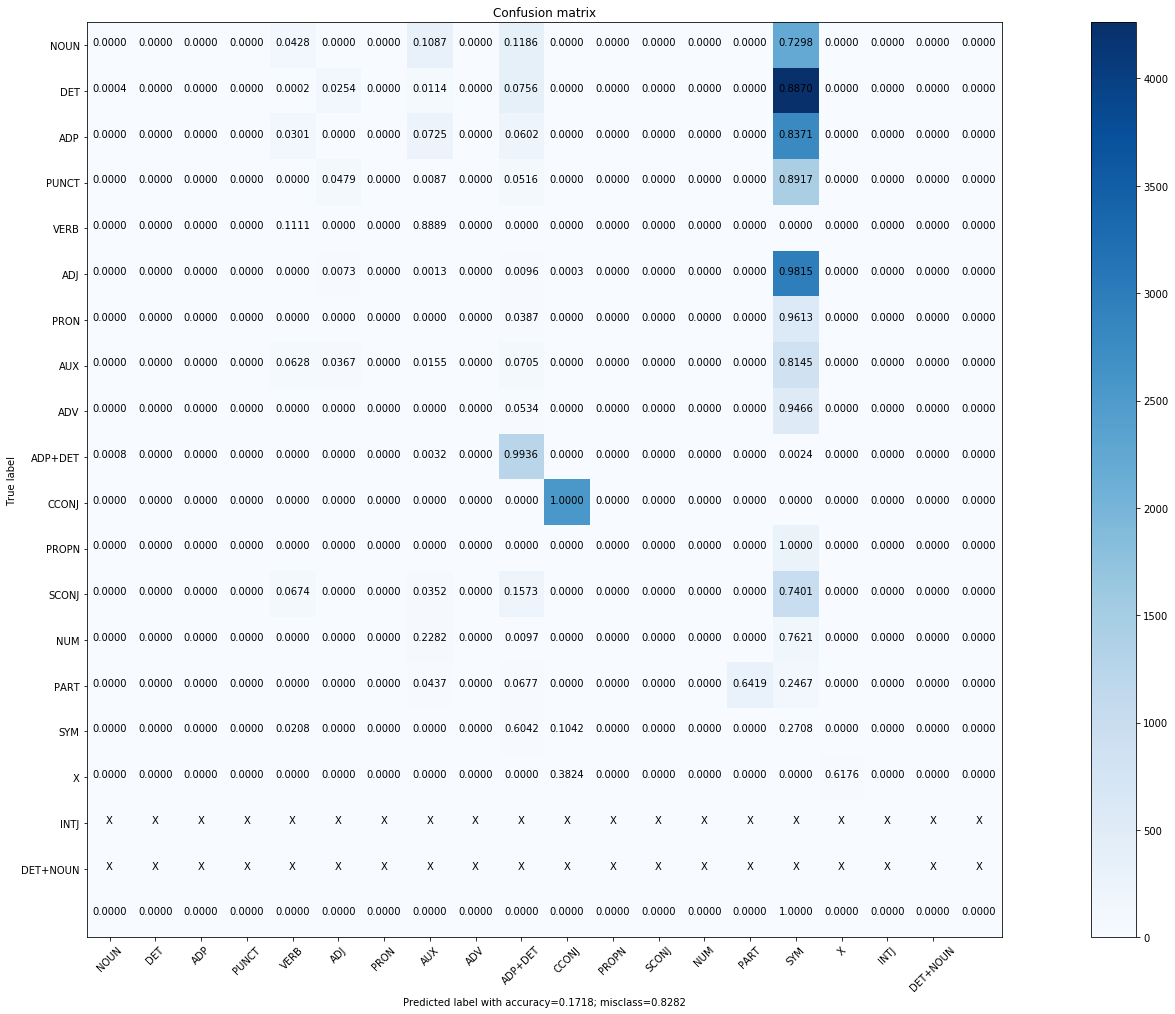

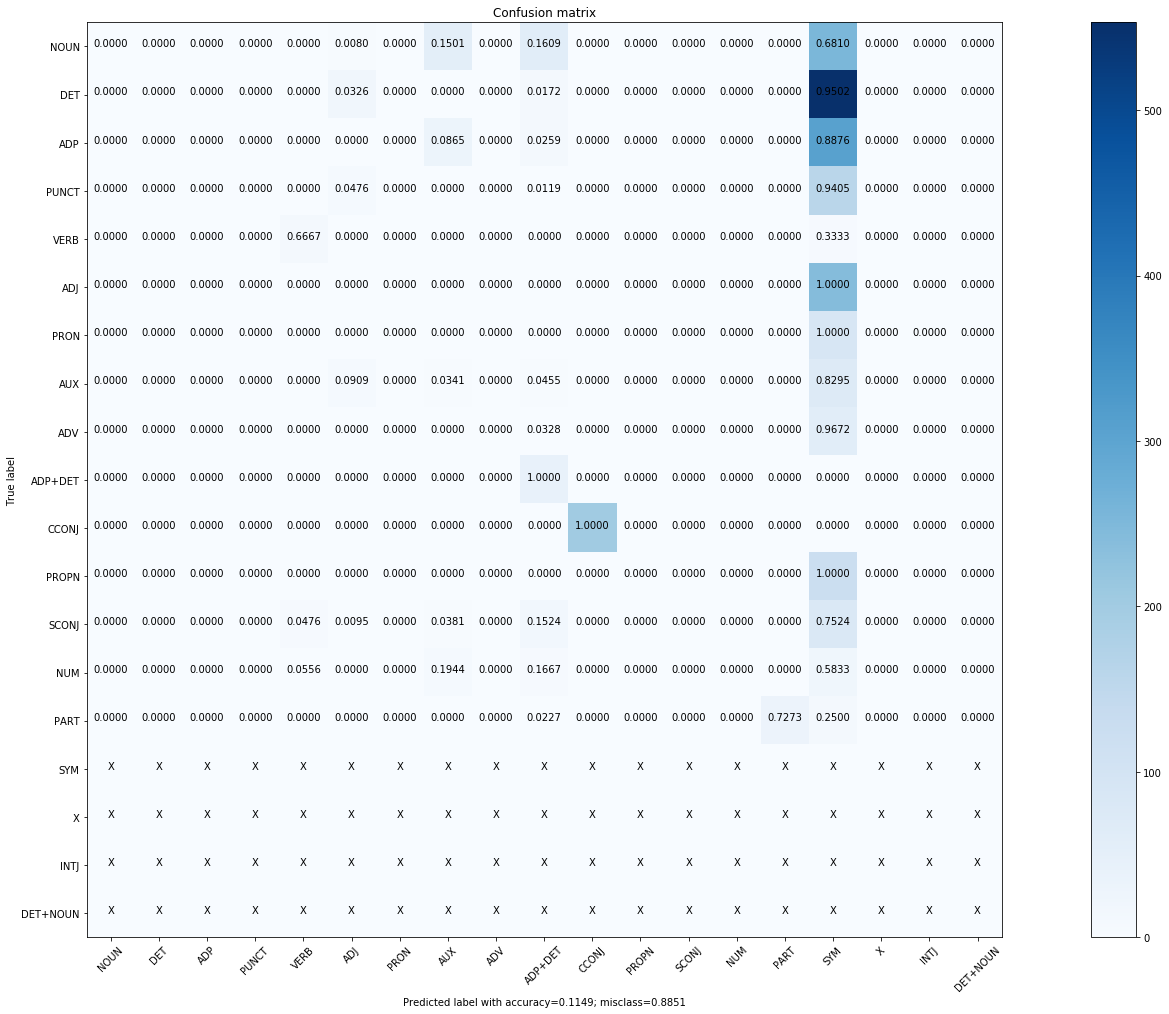

In [11]:
import NaiveBayesClassifier as naivebc
import time

for nameDataSet, _ in da.listeCorpus.items():
    if nameDataSet not in ["foot", "natdis"]:
        print("Begin : ", nameDataSet)
        train, test = da.listeCorpus[nameDataSet].trainDataSet, da.listeCorpus[nameDataSet].testDataSet


        Xtrain, Ytrain = ft.buildFeature(train)
        Xtest, Ytest = ft.buildFeature(test)
        decisionTree = dtree.DecisionTreeClassifier(Xtrain, Ytrain)

        naiveBC = naivebc.NaiveBayesClassifier(Xtrain, Ytrain)
        
        t = time.time()
        naiveBC.fit()
        print("training time :", time.time() - t)
        
        t2 = time.time()
        score, cm = naiveBC.modelScore(Xtest, Ytest)
        print("score time : ", time.time() - t2)
        
        print("score on " + nameDataSet + " is " + str(score))
        
        ma.showConfusionMatrix(cm, decisionTree.classLabel.keys())

In [15]:
for nameDataSet, _ in da.listeCorpus.items():
    if nameDataSet in ["foot", "natdis"]:
        print("Begin : ", nameDataSet)
        train = da.listeCorpus[nameDataSet].trainDataSet


        Xtrain, Ytrain = ft.buildFeature(train)
        decisionTree = dtree.DecisionTreeClassifier(Xtrain, Ytrain)

        naiveBC = naivebc.NaiveBayesClassifier(Xtrain, Ytrain)
        
        t = time.time()
        naiveBC.fit()
        print("training time :", time.time() - t)
        
        t2 = time.time()
        score_foot, _ = naiveBC.modelScore(Xfoot, Yfoot)
        print("score foot time : ", time.time() - t2)
        
        t3 = time.time()
        score_natdis, _ = naiveBC.modelScore(Xnatdis, Ynatdis)
        print("score natdis time : ", time.time() - t3)
        
        print("score on " + nameDataSet + " with foot is " + str(score_foot))
        print("score on " + nameDataSet + " with natdis is " + str(score_natdis))
        
        #ma.showConfusionMatrix(cm, decisionTree.classLabel.keys())

Begin :  partut
training time : 3.429633855819702
score foot time :  72.63161611557007
score natdis time :  60.97222852706909
score on partut with foot is 24.469074007865572
score on partut with natdis is 18.274659581534376
